### 제주도 도로 교통량 예측 AI 경진대회

- https://dacon.io/competitions/official/235985/data

In [51]:
import pandas as pd

data_info = pd.read_csv('/content/data_info.csv')
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [52]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [53]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [54]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005741 entries, 0 to 1005740
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1005741 non-null  object 
 1   base_date              1005741 non-null  int64  
 2   day_of_week            1005741 non-null  object 
 3   base_hour              1005741 non-null  int64  
 4   lane_count             1005741 non-null  int64  
 5   road_rating            1005741 non-null  int64  
 6   road_name              1005741 non-null  object 
 7   multi_linked           1005741 non-null  int64  
 8   connect_code           1005741 non-null  int64  
 9   maximum_speed_limit    1005741 non-null  float64
 10  vehicle_restricted     1005741 non-null  float64
 11  weight_restricted      1005741 non-null  float64
 12  height_restricted      1005741 non-null  float64
 13  road_type              1005741 non-null  int64  
 14  start_node_name   

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [57]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            1
end_turn_restricted      1
target                   1
dtype: int64

In [58]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [59]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,1.005741e+06,1.005741e+06,1.005741e+06,1.005741e+06,1.005741e+06,1.005741e+06,1.005741e+06,1005741.0,1.005741e+06,1005741.0,1.005741e+06,1.005741e+06,1.005741e+06,1.005741e+06,1.005740e+06,1.005740e+06
mean,2.021671e+07,1.192897e+01,1.835450e+00,1.049574e+02,5.120603e-04,2.593073e-01,6.126011e+01,0.0,5.639719e+03,0.0,6.169720e-01,3.338436e+01,1.265216e+02,3.338433e+01,1.265216e+02,4.281328e+01
std,4.556375e+03,6.719416e+00,6.874229e-01,1.840272e+00,2.262297e-02,5.161535e+00,1.213331e+01,0.0,1.397408e+04,0.0,1.212544e+00,1.011813e-01,1.564622e-01,1.056105e-01,1.564396e-01,1.595590e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.000000e+00,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264220e+02,3.326459e+01,1.264220e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.120000e+02


In [60]:
test.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude
count,2.912410e+05,291241.000000,291241.000000,291241.000000,291241.0,291241.0,291241.000000,291241.0,291241.000000,291241.0,291241.000000,291241.000000,291241.000000,291241.000000,291241.000000
mean,2.022082e+07,11.856854,2.021371,105.245948,0.0,0.0,58.771430,0.0,3651.902033,0.0,0.634845,33.361624,126.512946,33.361651,126.512919
std,8.886111e+00,6.803378,0.750898,1.862653,0.0,0.0,11.390743,0.0,11327.618389,0.0,1.225362,0.116064,0.061478,0.116067,0.061344
min,2.022080e+07,0.000000,1.000000,103.000000,0.0,0.0,30.000000,0.0,0.000000,0.0,0.000000,33.243432,126.303780,33.243432,126.303780
25%,2.022081e+07,6.000000,1.000000,103.000000,0.0,0.0,50.000000,0.0,0.000000,0.0,0.000000,33.254214,126.476508,33.254214,126.476508
50%,2.022082e+07,12.000000,2.000000,106.000000,0.0,0.0,60.000000,0.0,0.000000,0.0,0.000000,33.272222,126.512046,33.272222,126.512046
75%,2.022082e+07,18.000000,3.000000,107.000000,0.0,0.0,70.000000,0.0,0.000000,0.0,0.000000,33.492718,126.561830,33.492718,126.561830
max,2.022083e+07,23.000000,3.000000,107.000000,0.0,0.0,80.000000,0.0,50000.000000,0.0,3.000000,33.521399,126.912948,33.521399,126.912948


- 각 피처들 하나씩살펴보기

##### 1. base_hour 시간대

In [61]:
train['base_hour'].value_counts()

13    46210
15    46074
14    45392
12    45365
19    45047
11    44632
18    44576
16    44470
10    44336
17    44251
20    43834
9     43818
21    43739
8     43250
22    42862
7     42564
6     40596
23    39238
1     38942
5     38938
2     36009
4     35209
3     33458
0     32931
Name: base_hour, dtype: int64

Axes(0.125,0.11;0.775x0.77)


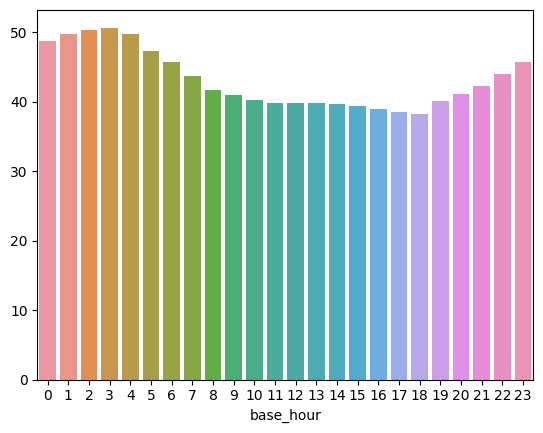

In [62]:
import seaborn as sns
base_hour = train.groupby('base_hour')['target'].mean()
print(sns.barplot(x=base_hour.index, y=base_hour.values ))

- 0~5시가 가장 평균 속도가 높음(차량 수 상대적으로 ↓)


- 17~18시가 평균 속도 가장 낮음(차량 수 상대적으로 ↑)

##### 2. lane_count 차로 수

In [63]:
train['lane_count'].value_counts()

2    503246
1    333995
3    168500
Name: lane_count, dtype: int64

<Axes: xlabel='lane_count'>

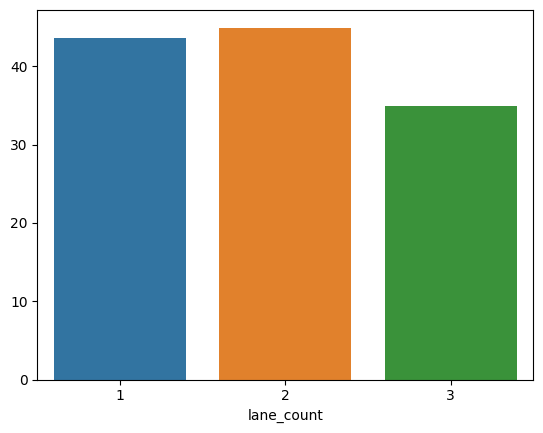

In [64]:
lane_count = train.groupby('lane_count')['target'].mean()
sns.barplot(x=lane_count.index, y=lane_count.values)

- 차로 수가 2개일 때, 평균 속도가 상대적으로 높음


- 차로 수가 3개일 때는 상대적으로 낮음

##### 3. road_rating 도로 등급

2    503246
1    333995
3    168500
Name: lane_count, dtype: int64


<Axes: xlabel='road_rating'>

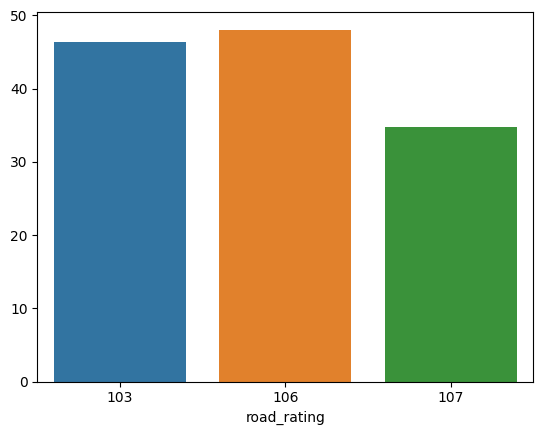

In [65]:
print(train['lane_count'].value_counts())

road_rating = train.groupby('road_rating')['target'].mean()
sns.barplot(x=road_rating.index, y=road_rating.values)

- 도로등급: 103(일반 국도), 106(지방도), 107(시/군도)


- 도로 등급이 106(지방도)일 때, 평균 속도가 상대적으로 높음


- 도로 등급이 107(시/군도)일 때, 상대적으로 낮음

##### 4. multi_linked 중용구간

In [66]:
train['multi_linked'].value_counts()

0    1005226
1        515
Name: multi_linked, dtype: int64

- 중용구간이 '있음'과 '없음'이 차이가 매우 큼 >> 제거하는게 좋을 듯

In [67]:
train = train.drop('multi_linked', axis=1)
test = test.drop('multi_linked', axis=1)

##### 5. connect_code 연결로 코드

In [68]:
train['connect_code'].value_counts()

0      1003209
103       2532
Name: connect_code, dtype: int64

- 연결로 코드 0(없음)과 103(있음)의 차이가 매우 큼 >> 마찬가지로 제거

In [69]:
train = train.drop('connect_code', axis=1)
test = test.drop('connect_code', axis=1)

##### 6. maximum_speed_limit 최대 속도 제한

maximum_speed_limit
30.0    32.286912
40.0    62.891462
50.0    35.484494
60.0    42.345679
70.0    41.393744
80.0    60.735043
Name: target, dtype: float64


<Axes: xlabel='maximum_speed_limit'>

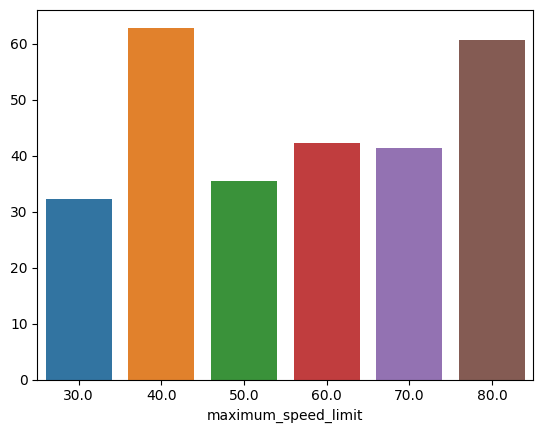

In [70]:
train['maximum_speed_limit'].value_counts()
msl = train.groupby('maximum_speed_limit')['target'].mean()
print(msl)
sns.barplot(x=msl.index, y=msl.values)

- 최대 속도 제한이 40, 80인 도로에서 평균 속도가 상대적으로 높음


- 최대 속도 제한이 30인 도로에서 상대적으로 낮음

<Axes: xlabel='maximum_speed_limit', ylabel='target'>

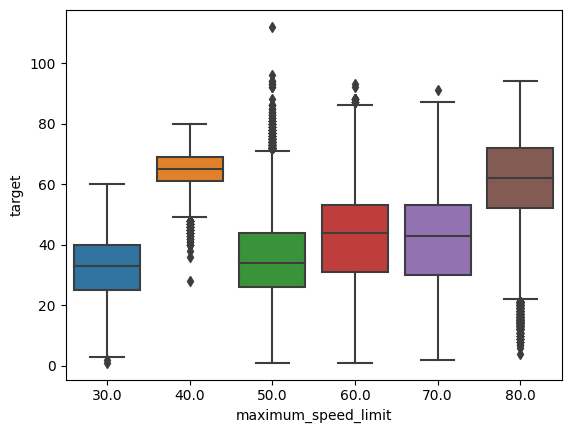

In [71]:
sns.boxplot(train, x='maximum_speed_limit', y='target')

- 각 속도 제한 마다 이상치가 매우 많음

##### 7. vehicle_restricted 통과 제한 차량

In [72]:
train['vehicle_restricted'].value_counts()

0.0    1005741
Name: vehicle_restricted, dtype: int64

- 유일값이 0.0으로 1개임 >> 제거

In [73]:
train = train.drop('vehicle_restricted', axis=1)
test = test.drop('vehicle_restricted', axis=1)

##### 8. weight_restricted	통과 제한 하중

In [74]:
print(train['weight_restricted'].value_counts())
print(train.groupby('weight_restricted')['target'].mean())

0.0        862208
43200.0     88132
32400.0     51435
50000.0      3966
Name: weight_restricted, dtype: int64
weight_restricted
0.0        40.965425
32400.0    47.475338
43200.0    57.978407
50000.0    47.077408
Name: target, dtype: float64


- 통과 제한 하중이 없을 때(0일 때) 평균 속도가 높음

##### 9. height_restricted 통과 제한 높이

In [75]:
train['height_restricted'].value_counts()

0.0    1005741
Name: height_restricted, dtype: int64

- 유일값이 0.0으로 1개임 >> 제거

In [76]:
train = train.drop('height_restricted', axis=1)
test = test.drop('height_restricted', axis=1)

##### 10. road_type 도로 유형

0    798903
3    206838
Name: road_type, dtype: int64
road_type
0    41.167829
3    49.168775
Name: target, dtype: float64
Axes(0.125,0.11;0.775x0.77)


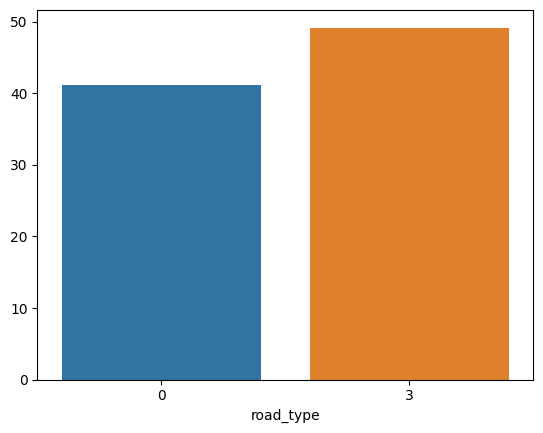

In [77]:
print(train['road_type'].value_counts())
road_type = train.groupby('road_type')['target'].mean()
print(road_type)
print(sns.barplot(x=road_type.index, y=road_type.values))

- 도로 유형이 3일 때 평균 속도가 상대적으로 높음

##### 11. road_name 도로명

In [78]:
print(train['road_name'].value_counts())

일반국도12호선    223754
-           122069
일반국도16호선    118926
일반국도95호선     53222
일반국도11호선     45915
             ...  
애원로           1602
아봉로           1546
남조로           1509
호서중앙로          570
호근로            132
Name: road_name, Length: 61, dtype: int64


- 도로명 결측치가 569,463개 있음 >> 상당 부분을 차지하기 때문에 다른 값으로 대체 or 제거


- 일단 도로명이 결측되어있는 행의 다른 피처 값 살펴보기

In [79]:
miss_road = train.groupby(train['road_name'] == '-')['road_rating', 'road_type', 'weight_restricted']
miss_road.value_counts()
# road_name이 '-'인 도로의 road_rating(도로 등급)은 모두 107임
# road_type은 0이 매우 많음


<ipython-input-79-00860c2710f0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  miss_road = train.groupby(train['road_name'] == '-')['road_rating', 'road_type', 'weight_restricted']


road_name  road_rating  road_type  weight_restricted
False      103          0          0.0                  346514
           107          0          0.0                  197799
           106          0          0.0                  151276
           103          3          43200.0               45915
                                   32400.0               34781
                                   0.0                   31157
           106          3          43200.0               25350
                                   0.0                   17710
           107          3          0.0                   14438
           106          3          32400.0               10696
           103          3          50000.0                3966
           107          3          43200.0                2349
                                   32400.0                1721
True       107          0          0.0                  103314
                        3          43200.0               14518
  

- 딱히 패턴이 발견되지 않음, 다른 값으로 대체하는 것보다 제거가 나을 듯

In [80]:
train = train.drop('road_name', axis=1)
test = test.drop('road_name', axis=1)

##### 12. day_of_week 요일

In [81]:
train.groupby('day_of_week')['target'].mean()


day_of_week
금    42.491549
목    42.798655
수    42.794450
월    42.748799
일    43.185277
토    42.959044
화    42.718448
Name: target, dtype: float64

- 요일에 따른 평균 속도는 거의 비슷함

In [82]:
#요일이랑 있음/없음으로 나눠지는 칼럼들 0,1,2,3..으로 인코딩해주기
from sklearn.preprocessing import LabelEncoder

col = ['day_of_week', 'start_turn_restricted', 'end_turn_restricted']

for i in col:
    encoder = LabelEncoder()
    encoder.fit(train[i])
    train[i] = encoder.transform(train[i])
    
for i in col:
    encoder = LabelEncoder()
    encoder.fit(test[i])
    test[i] = encoder.transform(test[i])
    
print(train[i])
print(test[i])

0          0
1          0
2          0
3          0
4          0
          ..
1005736    0
1005737    0
1005738    0
1005739    1
1005740    2
Name: end_turn_restricted, Length: 1005741, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
291236    0
291237    0
291238    1
291239    0
291240    0
Name: end_turn_restricted, Length: 291241, dtype: int64


In [83]:
train.head()
train.tail()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
1005736,TRAIN_1005736,20211015,0,22,1,103,60.0,0.0,0,명월교차로,33.398662,126.263630,0,명월하동,33.396334,126.260544,0,59.0
1005737,TRAIN_1005737,20220110,3,4,2,103,80.0,0.0,0,창흥교차로,33.508108,126.887393,0,하도입구,33.518327,126.882437,0,59.0
1005738,TRAIN_1005738,20220103,3,16,2,107,60.0,0.0,0,부동산,33.254531,126.511810,0,오름식당,33.253648,126.511497,0,21.0
1005739,TRAIN_1005739,20211229,2,9,3,103,70.0,0.0,0,인제사거리,33.507384,126.540331,1,영락교회,33.509729,126.543144,1,23.0
1005740,TRAIN_1005740,20220509,3,19,2,103,50.0,0.0,0,미수2교,33.483661,126.405096,0,미수2교,3.000000,NaN,2,NaN


In [84]:
test.tail()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
291236,TEST_291236,20220827,5,5,1,103,80.0,0.0,0,월산마을,33.472819,126.463030,0,도근교,33.470483,126.460846,0
291237,TEST_291237,20220819,0,20,2,103,60.0,0.0,0,영주교,33.305359,126.598914,0,하례입구삼거리,33.300796,126.600332,0
291238,TEST_291238,20220805,0,11,1,107,30.0,0.0,0,마리나사거리,33.493624,126.496769,1,칠오광장사거리,33.497500,126.496946,1
291239,TEST_291239,20220812,0,7,2,107,60.0,0.0,0,국민의료보험관리공단,33.254782,126.507014,0,의료보험조합,33.255659,126.507333,0
291240,TEST_291240,20220812,0,10,3,106,70.0,0.0,0,수모루교차로,33.246996,126.524358,0,수모루,33.247053,126.523503,0


- 모델링에 필요없는 피처들 마저 제거

In [97]:
X_train = train.drop(['id', 'base_date', 'start_node_name', 'end_node_name', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id', 'base_date', 'start_node_name', 'end_node_name'], axis=1)


In [86]:
X_train.head(3)

,day_of_week,base_hour,lane_count,road_rating,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted
0,1,17,1,106,60.0,32400.0,3,33.427747,126.662612,0,33.427749,126.662335,0
1,1,21,2,103,60.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0
2,4,7,2,103,80.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0


#### 모델 선정, 학습, 예측

In [99]:
#학습, 예측
import lightgbm as lgb
from lightgbm import LGBMRegressor
LR = lgb.LGBMRegressor(random_state=42).fit(X_train, y_train)
pred = LR.predict(X_test)

In [100]:
print(pred)
len(pred)

[26.53519443 45.14235431 60.14120439 ... 21.08211915 25.38049222
 42.19451889]


291241

In [102]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
sample_submission['target'] = pred
sample_submission.to_csv("./jeju_submit.csv", index = False)

In [103]:
sample_submission

,id,target
0,TEST_000000,26.535194
1,TEST_000001,45.142354
2,TEST_000002,60.141204
3,TEST_000003,35.813601
4,TEST_000004,37.647478
...,...,...
291236,TEST_291236,45.840183
291237,TEST_291237,53.357572
291238,TEST_291238,21.082119
291239,TEST_291239,25.380492


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

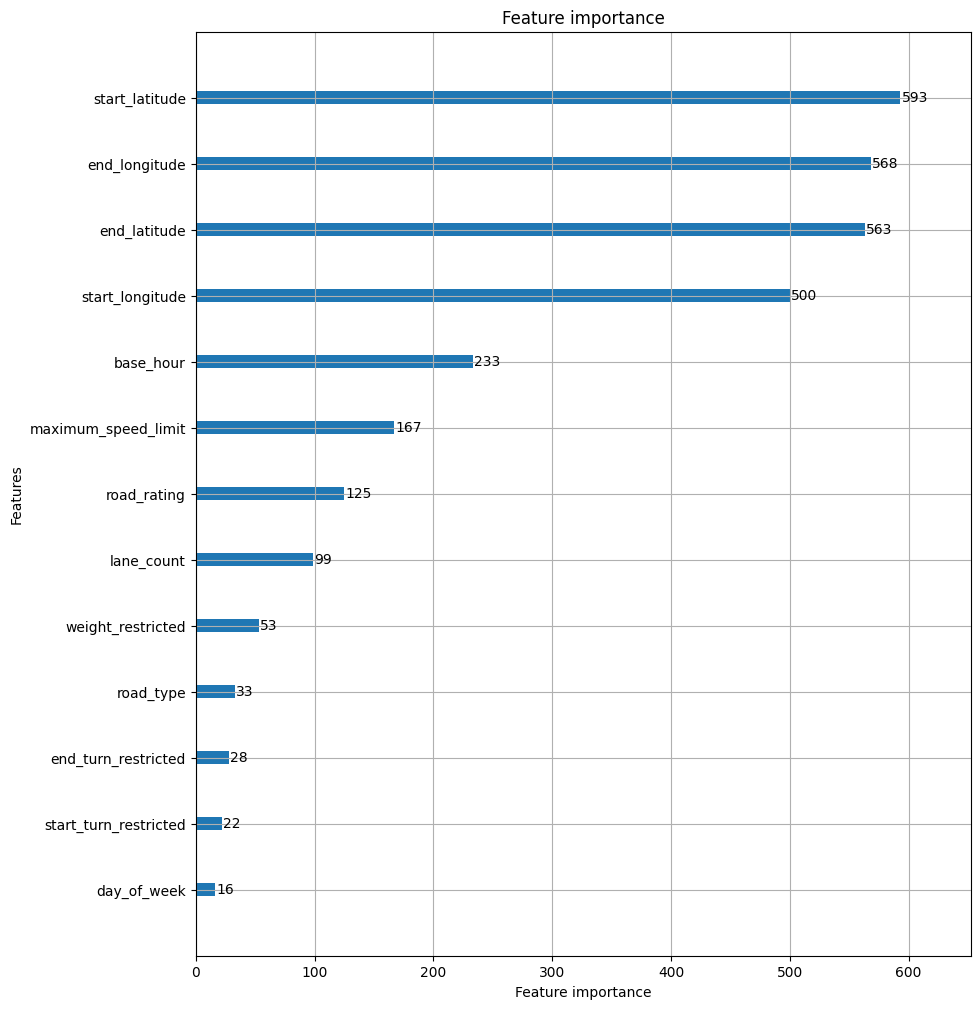

In [104]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(LR, ax=ax)

시작점 위/경도, 끝지점 위/경도 피처들이 가장 높은 중요도를 갖고있음

어케 활용해야 할지 모르겠는게 이 대회에서 나의 한계...

전처리 공부를 더 해야할거같다..